In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Demos/housing.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
housing = pd.read_csv(file_content_stream)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
from sklearn.model_selection import train_test_split

## Removing NAs
housing = housing.dropna()

## Defining input and target variable
X = housing.drop(columns = ['median_house_value', 'ocean_proximity'], axis = 1)
Y = housing['median_house_value']

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
from sklearn.linear_model import LinearRegression

## Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds = lm_md.predict(X_test)

## Computing the mse
mse = np.mean(np.power(preds - Y_test, 2))
mse

4598042359.514621

In [6]:
mse_results = []

for i in range(0, 100):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## Building the linear model
    lm_md = LinearRegression().fit(X_train, Y_train)

    ## Predicting on test
    preds = lm_md.predict(X_test)

    ## Computing the mse
    mse_results.append(np.mean(np.power(preds - Y_test, 2)))    

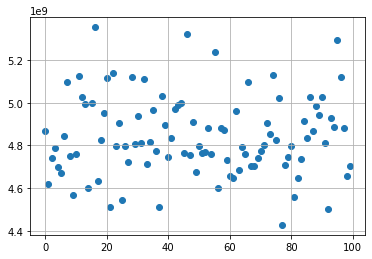

In [9]:
import matplotlib.pyplot as plt

runs = range(0, 100)
plt.scatter(runs, mse_results)
plt.grid()
plt.show()